# 01 - Exploratory Analysis

The purpose of this notebook is to perform an exploratory analysis of the training / test Cercare datasets, including :

- Summary Statistics
- Class Distribution Overview
- Feature Distributions and Comparisons between Classes


In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import pandas as pd

import constants

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


## 1. Load & Inspect data :

In [2]:
DIR_DATA = Path.cwd() / "data"
print(fr"Data Directory: {str(DIR_DATA)}")
print(fr"Train Data exists : {(DIR_DATA / 'cercare_training_data.xlsx').exists()}")
print(fr"Test Data exists  : {(DIR_DATA / 'cercare_test_data.xlsx').exists()}")


Data Directory: /home/maichi/work/my_projects/CercareStatAnalysis/data
Train Data exists : True
Test Data exists  : True


In [3]:
# Load Cercare Training / Test Excel spreadsheets :
df_data = pd.read_excel(DIR_DATA / "cercare_training_data.xlsx").rename(columns=constants.DICT_RENAMING_MAPPING)
df_test = pd.read_excel(DIR_DATA / "cercare_test_data.xlsx").rename(columns=constants.DICT_RENAMING_MAPPING)
print("Data Loaded Successfully ! ")


Data Loaded Successfully ! 


In [4]:
# Display Summary :

print("Training Set: ")
print(f"- Rows: {df_data.shape[0]}, Columns: {df_data.shape[1]}")
print(f"- Unique patients: {df_data['num_patient'].nunique()}")
print("Columns: ", list(df_data.columns), "\n\n")

print("Test Set: ")
print(f"- Rows: {df_test.shape[0]}, Columns: {df_test.shape[1]}")
print(f"- Unique patients: {df_test['num_patient'].nunique()}")
print("Columns: ", list(df_test.columns))


Training Set: 
- Rows: 182, Columns: 29
- Unique patients: 96
Columns:  ['num_patient', 'Primitifs', 'Diagnosis', 'ADC_path', 'ADC_control', 'CBV_corr_path', 'CBV_corr_control', 'CBV_noncorr_path', 'CBV_noncorr_control', 'DELAY_lésion', 'DELAY_control', 'CTH_lésion', 'CTH_control', 'CTH MAX_lésion', 'CTH MAX_control', 'OEF_lésion', 'OEF_control', 'rLEAKAGE_lésion', 'rLEAKAGE_control', 'rCMRO2_lésion', 'rCMRO2_control', 'COV_lésion', 'COV_control', 'LOI_lésion', 'LOI_control', 'rRHP', 'pred_wo_tram', 'Tram', 'pred_w_tram'] 


Test Set: 
- Rows: 23, Columns: 30
- Unique patients: 23
Columns:  ['num_patient', 'Primitifs', 'Immunothérapie', 'Diagnosis', 'ADC_path', 'ADC_control', 'CBV_corr_path', 'CBV_corr_control', 'CBV_noncorr_path', 'CBV_noncorr_control', 'DELAY_lésion', 'DELAY_control', 'CTH_lésion', 'CTH_control', 'CTH MAX_lésion', 'CTH MAX_control', 'OEF_lésion', 'OEF_control', 'rLEAKAGE_lésion', 'rLEAKAGE_control', 'rCMRO2_lésion', 'rCMRO2_control', 'COV_lésion', 'COV_control', 'LOI

In [20]:
# Descriptive statistics :
print("Training set summary statistics: ")
display(df_data.describe())

print("\nTest set summary statistics: ")
display(df_test.describe())


Training set summary statistics: 


,num_patient,Diagnosis,ADC_path,ADC_control,CBV_corr_path,CBV_corr_control,CBV_noncorr_path,CBV_noncorr_control,DELAY_lésion,DELAY_control,...,rCMRO2_lésion,rCMRO2_control,COV_lésion,COV_control,LOI_lésion,LOI_control,rRHP,pred_wo_tram,Tram,pred_w_tram
count,103.000000,182.00000,180.000000,180.000000,171.000000,178.000000,181.000000,181.000000,181.000000,177.000000,...,181.000000,181.000000,180.000000,179.000000,180.000000,178.000000,176.000000,182.000000,176.000000,181.000000
mean,47.359223,0.39011,1.264450,0.921056,3.295322,3.131067,3.538011,3.136133,1.403923,1.629887,...,387.761867,457.695486,1.462000,1.612626,0.019292,0.001614,0.831790,0.225275,0.272727,0.303867
std,27.511799,0.48912,0.438532,0.346977,2.931245,1.933728,2.911212,1.842984,1.760170,2.111195,...,312.799435,310.663595,1.247696,0.913584,0.101318,0.015013,0.589908,0.418916,0.446632,0.461202
min,1.000000,0.00000,0.300000,0.100000,0.200000,0.120000,0.200000,0.400000,0.020000,0.010000,...,17.640000,23.900000,0.030000,0.030000,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000
25%,24.000000,0.00000,0.995000,0.757500,1.410000,2.082500,1.510000,2.110000,0.250000,0.400000,...,125.770000,229.430000,0.520000,1.025000,0.000000,0.000000,0.440000,0.000000,0.000000,0.000000
50%,46.000000,0.00000,1.190000,0.830000,2.230000,2.820000,2.600000,2.800000,0.550000,0.870000,...,279.110000,396.100000,1.140000,1.560000,0.000000,0.000000,0.780000,0.000000,0.000000,0.000000
75%,70.500000,1.00000,1.510000,1.000000,4.475000,3.740000,4.870000,3.740000,1.980000,2.080000,...,655.700000,643.150000,2.050000,2.035000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,96.000000,1.00000,3.200000,3.000000,18.240000,17.000000,19.340000,18.000000,8.660000,15.580000,...,1169.030000,2181.740000,9.640000,4.200000,1.270000,0.190000,3.250000,1.000000,1.000000,1.000000



Test set summary statistics: 


,num_patient,Immunothérapie,Diagnosis,ADC_path,ADC_control,CBV_corr_path,CBV_corr_control,CBV_noncorr_path,CBV_noncorr_control,DELAY_lésion,...,rCMRO2_lésion,rCMRO2_control,COV_lésion,COV_control,LOI_lésion,LOI_control,rRHP,pred_wo_tram,Tram,pred_w_tram
count,23.00000,23.000000,23.000000,0.0,0.0,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,0.0,0.0,0.0,23.000000,23.000000,23.000000
mean,12.00000,0.260870,0.304348,NaN,NaN,1.836957,1.144348,7.299130,3.840435,1.353478,...,14.034348,11.502609,1.399130,1.179130,NaN,NaN,NaN,0.434783,0.304348,0.304348
std,6.78233,0.448978,0.470472,NaN,NaN,0.987809,0.465850,4.754701,1.327001,1.057925,...,6.570700,4.335431,0.424574,0.335233,NaN,NaN,NaN,0.506870,0.470472,0.470472
min,1.00000,0.000000,0.000000,NaN,NaN,0.390000,0.360000,1.610000,1.200000,0.060000,...,2.230000,3.960000,0.890000,0.980000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6.50000,0.000000,0.000000,NaN,NaN,1.125000,0.835000,3.900000,3.040000,0.440000,...,8.720000,8.245000,1.125000,1.020000,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,12.00000,0.000000,0.000000,NaN,NaN,1.590000,1.060000,6.490000,4.010000,1.310000,...,12.010000,10.600000,1.260000,1.100000,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,17.50000,0.500000,1.000000,NaN,NaN,2.215000,1.315000,8.930000,4.620000,2.115000,...,18.705000,13.620000,1.660000,1.175000,NaN,NaN,NaN,1.000000,1.000000,1.000000
max,23.00000,1.000000,1.000000,NaN,NaN,4.200000,2.200000,18.240000,7.370000,3.670000,...,26.500000,20.680000,2.800000,2.590000,NaN,NaN,NaN,1.000000,1.000000,1.000000


In [21]:
# Class Balance :
def print_diagnosis_distribution(df, label, column="Diagnosis"):

    counts = df[column].value_counts().rename(index=constants.LABEL_MAP)
    percentages = (counts / counts.sum() * 100).round(2)
    summary = pd.DataFrame({"count": counts, "percentage (%)": percentages})
    print(f"\nDiagnosis distribution ({label}):")
    print(summary)

print_diagnosis_distribution(df_data, "Training Set")
print_diagnosis_distribution(df_test, "Test Set")



Diagnosis distribution (Training Set):
                    count  percentage (%)
Diagnosis                                
Radiation Necrosis    111           60.99
Tumor Recurrence       71           39.01

Diagnosis distribution (Test Set):
                    count  percentage (%)
Diagnosis                                
Radiation Necrosis     16           69.57
Tumor Recurrence        7           30.43


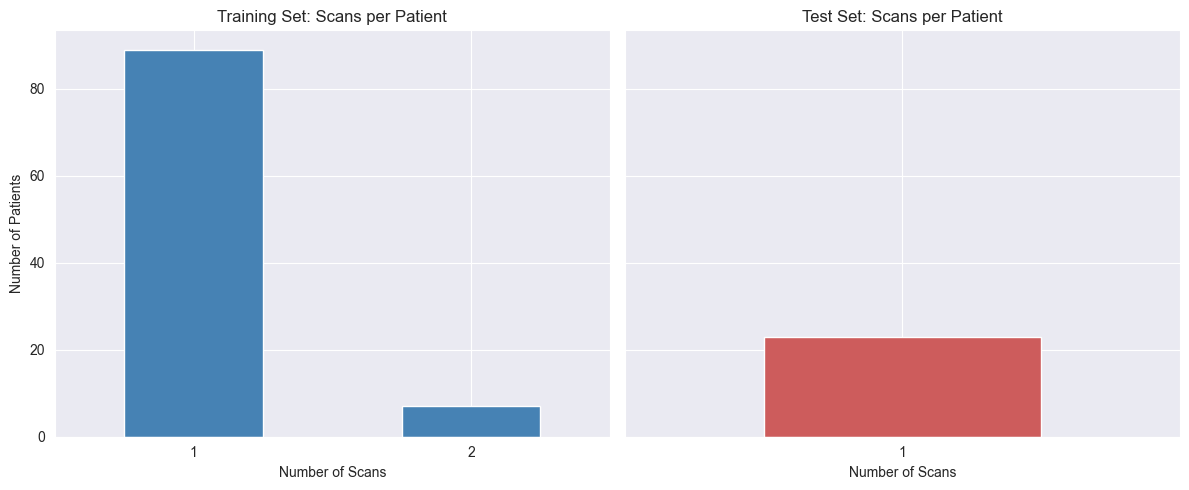

In [22]:
# Distribution of scans per patient (Training and Test Sets)
train_scan_counts = df_data["num_patient"].value_counts()
test_scan_counts = df_test["num_patient"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set plot
train_scan_counts.value_counts().sort_index().plot.bar(ax=axes[0], rot=0, color="steelblue")
axes[0].set_title("Training Set: Scans per Patient")
axes[0].set_xlabel("Number of Scans")
axes[0].set_ylabel("Number of Patients")

# Test set plot
test_scan_counts.value_counts().sort_index().plot.bar(ax=axes[1], rot=0, color="indianred")
axes[1].set_title("Test Set: Scans per Patient")
axes[1].set_xlabel("Number of Scans")

plt.tight_layout()
plt.show()


In [23]:
# Unique primitifs
print("Unique Primitifs in Training Set:", sorted(df_data["Primitifs"].unique().tolist()))
print("Unique Primitifs in Test Set    :", sorted(df_test["Primitifs"].unique().tolist()))

train_primitifs_df = df_data["Primitifs"].value_counts().sort_index().to_frame(name="count").T
test_primitifs_df = df_test["Primitifs"].value_counts().sort_index().to_frame(name="count").T

print("Primitifs distribution (Training Set):")
display(train_primitifs_df)

print("Primitifs distribution (Test Set):")
display(test_primitifs_df)

# Patients with multiple Primitifs
train_multi = df_data[["num_patient", "Primitifs"]].drop_duplicates()
train_multi_count = train_multi.groupby("num_patient").count()
train_with_multiple = train_multi_count[train_multi_count["Primitifs"] > 1]
print(f"\nPatients in training set with more than one Primitif: {len(train_with_multiple)} \n")
display(df_data[df_data["num_patient"].isin(train_with_multiple.index)])


Unique Primitifs in Training Set: ['CBNPC', 'Lymphome', 'Melanome', 'Ovaire', 'Rein', 'Sarcome', 'Sein', 'Thyroide Papillaire', 'colon']
Unique Primitifs in Test Set    : ['CBNPC', 'CBPC', 'Endomètre', 'Melanome', 'Ovaire', 'Rein', 'Sein', 'Thyroïde', 'Œsophage']
Primitifs distribution (Training Set):


Primitifs,CBNPC,Lymphome,Melanome,Ovaire,Rein,Sarcome,Sein,Thyroide Papillaire,colon
count,81,1,48,6,3,8,25,9,1


Primitifs distribution (Test Set):


Primitifs,CBNPC,CBPC,Endomètre,Melanome,Ovaire,Rein,Sein,Thyroïde,Œsophage
count,6,2,1,2,1,1,7,2,1



Patients in training set with more than one Primitif: 1 



,num_patient,Primitifs,Diagnosis,ADC_path,ADC_control,CBV_corr_path,CBV_corr_control,CBV_noncorr_path,CBV_noncorr_control,DELAY_lésion,...,rCMRO2_lésion,rCMRO2_control,COV_lésion,COV_control,LOI_lésion,LOI_control,rRHP,pred_wo_tram,Tram,pred_w_tram
96,54.0,Melanome,0,1.57,0.90,7.50,1.65,7.37,1.65,0.07,...,277.69,827.82,0.57,1.69,0.0,0.0,1.38,0,0.0,0.0
149,54.0,CBNPC,0,1.67,0.57,0.42,4.49,0.20,4.49,0.20,...,125.77,796.74,0.39,0.94,0.0,0.0,0.04,0,0.0,0.0


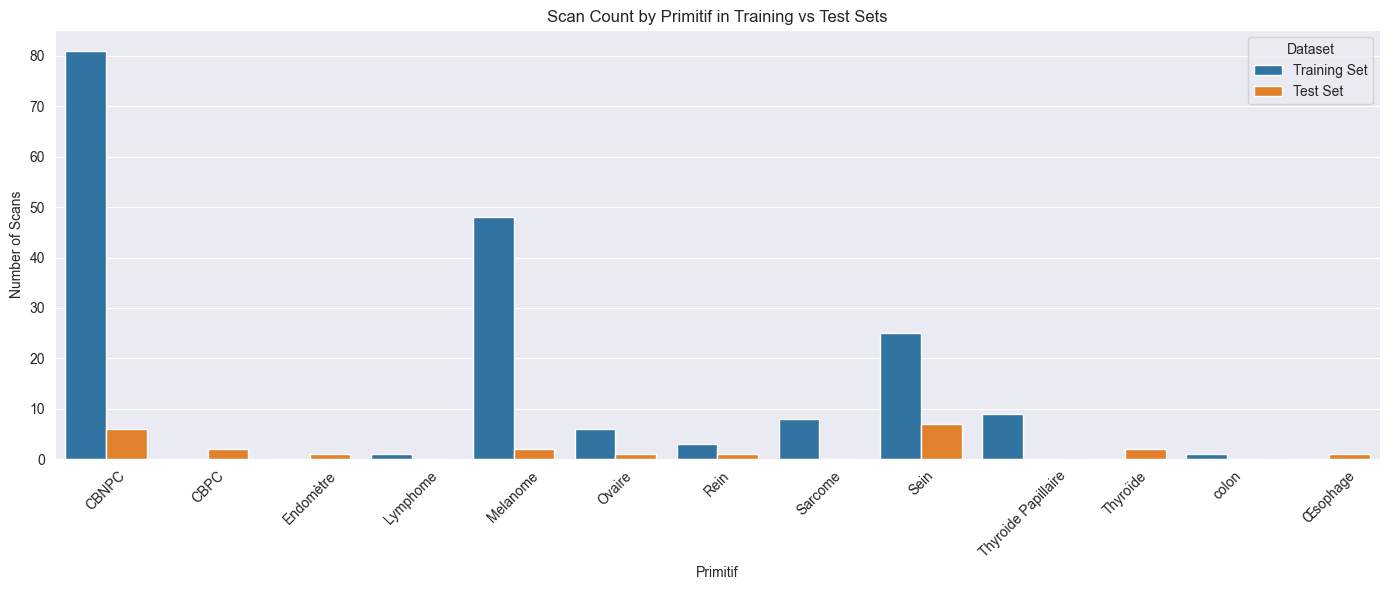

In [24]:
# Unified list of primitifs
all_primitifs = sorted(set(df_data["Primitifs"].unique()) | set(df_test["Primitifs"].unique()))

# Count per primitifs
train_counts = df_data["Primitifs"].value_counts().reindex(all_primitifs, fill_value=0)
test_counts = df_test["Primitifs"].value_counts().reindex(all_primitifs, fill_value=0)

primitifs_df = pd.DataFrame({
    "Primitif": all_primitifs,
    "Training Set": train_counts.values,
    "Test Set": test_counts.values
})
primitifs_long = primitifs_df.melt(id_vars="Primitif", var_name="Dataset", value_name="Count")

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=primitifs_long, x="Primitif", y="Count", hue="Dataset")
plt.title("Scan Count by Primitif in Training vs Test Sets")
plt.xticks(rotation=45)
plt.ylabel("Number of Scans")
plt.xlabel("Primitif")
plt.tight_layout()
plt.show()
